<a href="https://colab.research.google.com/github/julianovale/PO240_Meta_heuristica/blob/main/PO240_Semana02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link dos slides:

https://drive.google.com/file/d/0B4zUGKjaO9uEVFQ5UjE2Q2NjSEU/edit

In [121]:
import numpy as np
import matplotlib.pyplot as plt

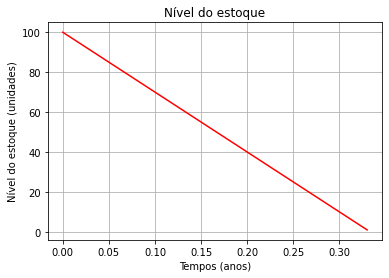

In [122]:
# Gráfico nível de estoque x tempo - ver slides - p. 5

q = 100
D = 300
t = np.arange(0,q/D,(q/D)/100)
I = -(D)*t+q
plt.plot(t,I,'-r')
plt.grid()
plt.title('Nível do estoque')
plt.xlabel('Tempos (anos)')
plt.ylabel('Nível do estoque (unidades)')
plt.show()

In [123]:
# Calculadora do lote econômico - ver slides - p. 14

p = 0.5
h = 0.05
K = 0.84
D = 300

q = (2*K*D/h)**(1/2)
print("Lote econômico: ", q)

Lote econômico:  100.39920318408906


In [124]:
#@title Calculadora do lote econômico {run: "auto"}


p = 0.5#@param {type: "number"}
h = 0.8#@param {type: "number"}
K = 0.84#@param {type: "number"}
D = 2000#@param {type: "number"}


# lote econômico
qo = (2*K*D/h)**(1/2)
print("Lote econômico: ", qo)

Lote econômico:  64.8074069840786


Lote econômico:  31.74901573277509
Custo do lote econômico:  255.87450786638755


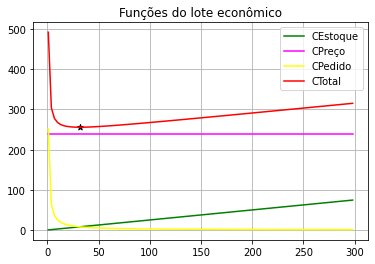

In [125]:
#@title Calculadora do lote econômico {run: "auto"}


p = 0.8#@param {type: "number"}
h = 0.5#@param {type: "number"}
K = 0.84#@param {type: "number"}
D = 300#@param {type: "number"}

# vetor de valores de q
q = np.arange(1,D,D/100)

# funções de custo
cp = (K*D)*(1./q)
cc = np.full((len(q),1),p*D)
cc = np.concatenate(cc,axis=0)
ce = (h/2)*q
ct = np.add(np.add(cp,ce),cc)

# lote econômico
qo = (2*K*D/h)**(1/2)
co = (K*D/qo)+(p*D)+((h/2)*qo)
print("Lote econômico: ", qo)
print("Custo do lote econômico: ", co)

# Gráfico das funções
plt.plot(q,ce,color='green')
plt.plot(q,cc,color='magenta')
plt.plot(q,cp,color='yellow')
plt.plot(q,ct,color='red')
plt.scatter(qo,co,color='black', marker='*')
plt.title('Funções do lote econômico')
plt.legend(['CEstoque','CPreço','CPedido','CTotal'])
plt.grid()
plt.show()

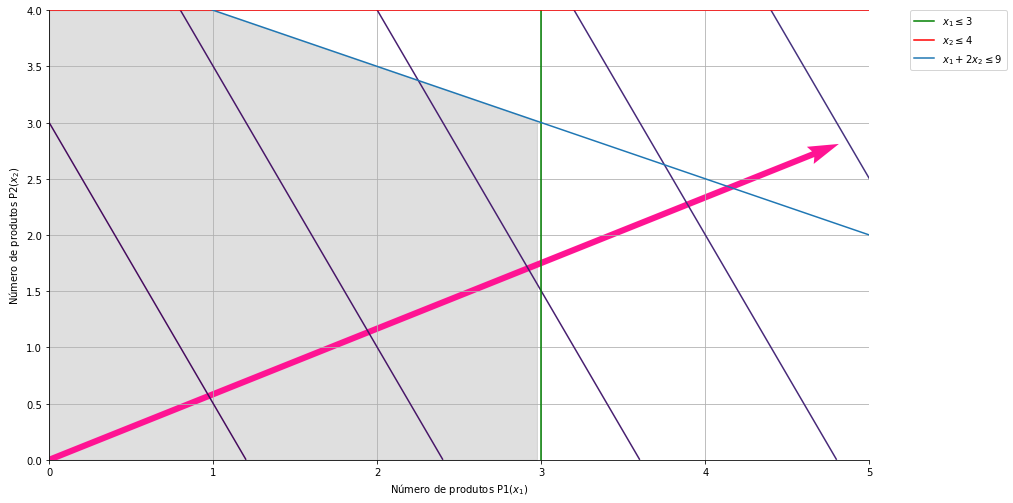

In [128]:
# Modelo de produção - Slides - p. 17

x1 = np.linspace(0,30,1000)
x2 = np.linspace(0,30,1000)

y1 = 4

fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)
plt.axvline(3, color='g', label='$x_1 \leq 3$')
plt.axhline(y1, color='r', label='$x_2 \leq 4$')
y2 = 4.5 - (x1/2) # transforma x2 em função de x1
plt.plot(x1,y2,label='$x_1 + 2x_2 \leq 9$')


plt.xlim(0,5)
plt.ylim(0,4)
plt.xlabel(r'Número de produtos P1($x_1$)')
plt.ylabel(r'Número de produtos P2($x_2$)')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.fill_between(x1, np.minimum(y2,y1), where=x1<=3, color = 'gray', alpha = 0.25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fx1 = 5
fx2 = 2
ax.quiver(fx1,fx2,color='deeppink', scale_units='xy', scale=1)

X1, X2 = np.meshgrid(x1, x2)
Z = 5*X1+2*X2
plt.contour(X1, X2, Z, 40)

plt.grid()
plt.show()

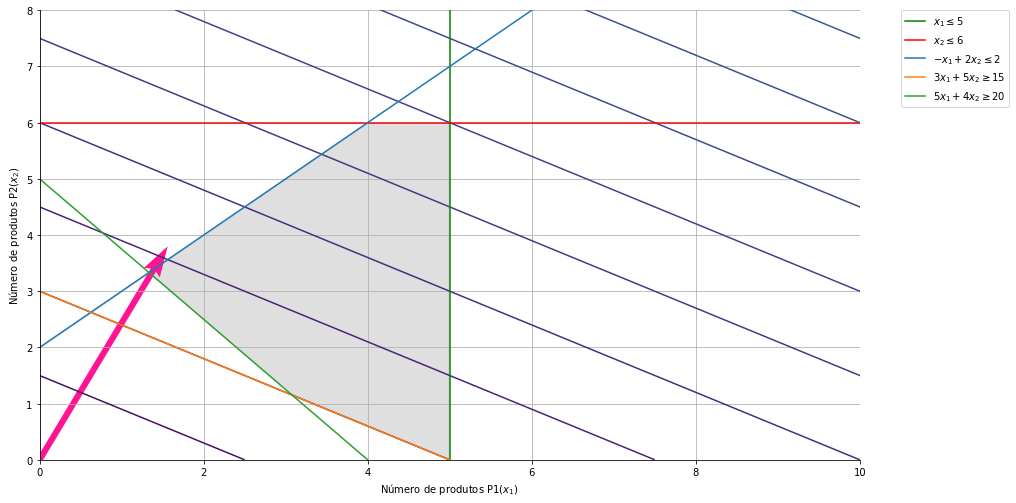

In [129]:
# Modelo de produção - Slides - p. 17

x1 = np.linspace(0,30,1000)
x2 = np.linspace(0,30,1000)

y1 = 6

fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)
plt.axvline(5, color='g', label='$x_1 \leq 5$')
plt.axhline(y1, color='r', label='$x_2 \leq 6$')
y2 = 2 + x1 # transforma x2 em função de x1
plt.plot(x1,y2,label='$-x_1 + 2x_2 \leq 2$')
y3 = 3 - (3/5)*x1 # transforma x2 em função de x1
plt.plot(x1,y3,label='$3x_1 + 5x_2 \geq 15$')
y4 = 5 - (5/4)*x1 # transforma x2 em função de x1
plt.plot(x1,y4,label='$5x_1 + 4x_2 \geq 20$')
plt.xlim(0,10)
plt.ylim(0,8)
plt.xlabel(r'Número de produtos P1($x_1$)')
plt.ylabel(r'Número de produtos P2($x_2$)')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

y21 = np.minimum(y2, y1)
y43 = np.maximum(y3, y4)
y4321 = np.minimum(y21, y43)

plt.fill_between(x1, y21, y4321, where=x1<=5, color = 'gray', alpha = 0.25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fx1 = 6
fx2 = 10
ax.quiver(fx1,fx2,color='deeppink', scale_units='xy', scale=3)

X1, X2 = np.meshgrid(x1, x2)
Z = fx1*X1+fx2*X2
plt.contour(X1, X2, Z, 40)

plt.grid()
plt.show()